In [3]:
from fastbook import *
from fastai.vision.widgets import *
import os

First, we inspect the path at which our dataset on dog breeds is available.

In [4]:
data_path = '/mnt/data/data_science/dog_imgs'
os.listdir(data_path)

['Norfolk_terrier', 'bloodhound', 'beagle', 'miniature_schnauzer', 'basset']

We see that there are 5 directories, where each directory contains images for 1 dog breed. Our task will be to train a deep learning model to classify images based on their breed.

## Explore the filed and data structure

In [ ]:
List files from one directory

In [5]:
os.listdir('/mnt/data/data_science/dog_imgs/miniature_schnauzer')

['n02097047_1028.jpg',
 'n02097047_2663.jpg',
 'n02097047_1956.jpg',
 'n02097047_2466.jpg',
 'n02097047_2289.jpg',
 'n02097047_731.jpg',
 'n02097047_5644.jpg',
 'n02097047_1545.jpg',
 'n02097047_1913.jpg',
 'n02097047_3429.jpg',
 'n02097047_5046.jpg',
 'n02097047_2472.jpg',
 'n02097047_610.jpg',
 'n02097047_6534.jpg',
 'n02097047_5581.jpg',
 'n02097047_1527.jpg',
 'n02097047_1287.jpg',
 'n02097047_2178.jpg',
 'n02097047_5869.jpg',
 'n02097047_2565.jpg',
 'n02097047_37.jpg',
 'n02097047_2937.jpg',
 'n02097047_1721.jpg',
 'n02097047_4634.jpg',
 'n02097047_2002.jpg',
 'n02097047_5205.jpg',
 'n02097047_1556.jpg',
 'n02097047_3074.jpg',
 'n02097047_6328.jpg',
 'n02097047_2463.jpg',
 'n02097047_157.jpg',
 'n02097047_2605.jpg',
 'n02097047_1412.jpg',
 'n02097047_951.jpg',
 'n02097047_2470.jpg',
 'n02097047_946.jpg',
 'n02097047_3978.jpg',
 'n02097047_1601.jpg',
 'n02097047_5806.jpg',
 'n02097047_4274.jpg',
 'n02097047_581.jpg',
 'n02097047_1327.jpg',
 'n02097047_1418.jpg',
 'n02097047_834.jpg

In [ ]:
Open an example image

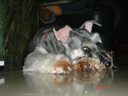

In [6]:
im = Image.open('/mnt/data/data_science/dog_imgs/miniature_schnauzer/n02097047_2418.jpg')
im.to_thumb(128,128)

Let's verify we can get all the images in the subfolder

In [ ]:
?get_image_files

In [34]:
fns = get_image_files(data_path)
fns

(#883) [Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_1498.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_1852.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_1416.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_1610.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_1505.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_113.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_2129.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_2454.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_4127.jpg'),Path('/mnt/data/data_science/dog_imgs/Norfolk_terrier/n02094114_947.jpg')...]

In [ ]:
# Find images in `fns` that can't be opened
verify_images(fns)

(#0) []

## Begin modeling steps
Set dataloads

In [7]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = dogs.dataloaders(data_path)

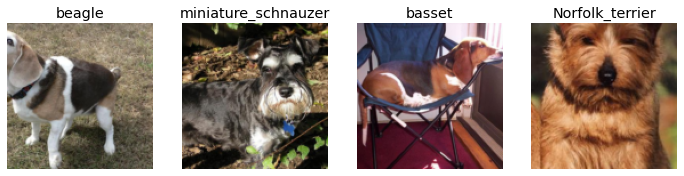

In [9]:
# view dogs preview
dls.valid.show_batch(max_n=4, nrows=1)

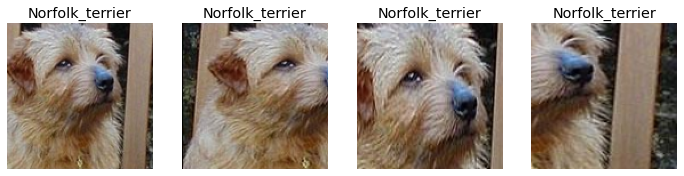

In [10]:
# look at crop
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(data_path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

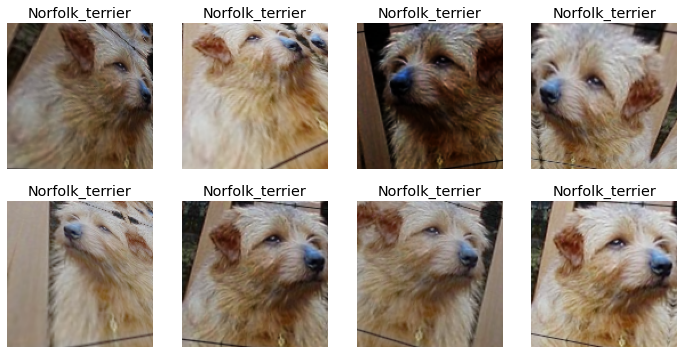

In [11]:
# play with augmentation
dogs2 = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls2 = dogs2.dataloaders(data_path)
dls2.train.show_batch(max_n=8, nrows=2, unique=True)

In [12]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2))

In [13]:
dogs

In [14]:
dls = dogs.dataloaders(data_path)
dls

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/aschmidt/.venv/dl_learning/lib/python3.8/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.815802,0.296843,0.125000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.546304,0.217560,0.079545,00:03
1,0.506615,0.234658,0.073864,00:02
2,0.423928,0.212884,0.051136,00:02
3,0.394237,0.204247,0.056818,00:02


In [16]:
## trying different resnet

learn34 = cnn_learner(dls, resnet34, metrics=error_rate)
learn34.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.718705,0.189309,0.068182,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.530874,0.140281,0.056818,00:04
1,0.396524,0.119218,0.045455,00:04
2,0.341521,0.145060,0.056818,00:04
3,0.290199,0.142122,0.045455,00:04


In [ ]:
# QQ: What is the first epoch referring to?
# resnet 34 seems more accurate

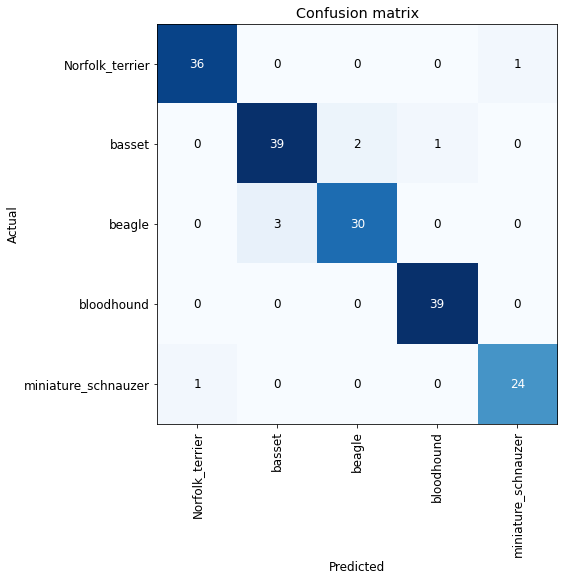

In [18]:
interp = ClassificationInterpretation.from_learner(learn34)
interp.plot_confusion_matrix(figsize=(8, 8))

# Explore loss

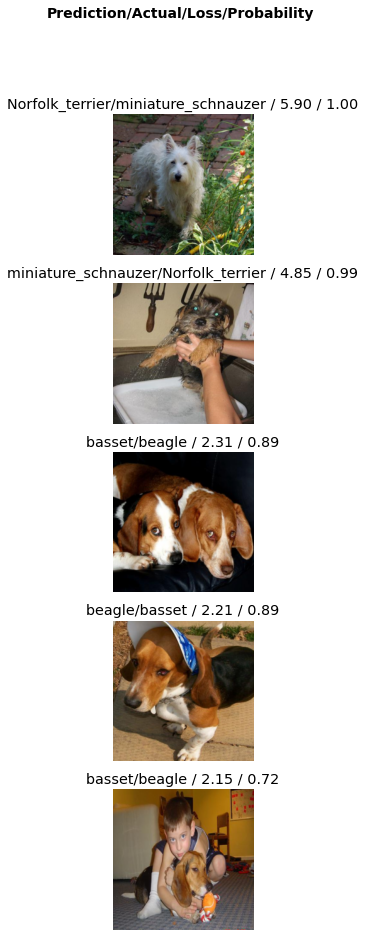

In [21]:
#prediction, actual (target label), loss, and probability.
interp.plot_top_losses(5, nrows=5)

In [ ]:
model has a hard time predicting basset vs beagle

In [23]:
#skipping this set because I don't know what these dogs are
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# Putting model in prod

In [25]:
learn34.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
#example prediction
learn_inf.predict('/mnt/data/data_science/dog_imgs/miniature_schnauzer/n02097047_2418.jpg')

('miniature_schnauzer',
 TensorBase(4),
 TensorBase([5.5313e-08, 3.1972e-08, 1.8017e-07, 1.8396e-07, 1.0000e+00]))

In [29]:
#
learn_inf.dls.vocab

['Norfolk_terrier', 'basset', 'beagle', 'bloodhound', 'miniature_schnauzer']

In [30]:
# upload image
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [37]:
# see upload
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [46]:
# get predictions
pred,pred_idx,probs = learn_inf.predict(img)

In [47]:
#display predictions
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: bloodhound; Probability: 1.0000')

In [50]:
#button for classification

btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
btn_run

Button(description='Classify', style=ButtonStyle())

## Vertical Box

In [51]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your animal!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
# uploaded https://www.utk.edu/images/i/warmers/gal-smokey.jpg
# prediction is wrong

# uploaded cat: https://www.thesprucepets.com/thmb/QDw4vt7XXQejL2IRztKeRLow6hA=/2776x1561/smart/filters:no_upscale()/cat-talk-eyes-553942-hero-df606397b6ff47b19f3ab98589c3e2ce.jpg
# predicion: miniature schnauzer